# We are going to merge these two datasets to see if there is any relationship between the spread of the virus in a country and how happy people are, living in that country.

# Import the libraries

**Libraries Required**

* _Numpy_ `pip install numpy`
* _Pandas_ `pip install pandas` 
* _Seaborn_ `pip install seaborn`
* _Matplotlib_ `pip install matplotlib`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2

# Importing COVID-19 Dataset

In [2]:
covid_dataset = pd.read_csv('C:/Users/FreeComp/Documents/EngAml/covid_confirmed.csv')
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779


# Check the shape of the dataframe

In [3]:
covid_dataset.shape

(266, 186)

# Delete the useless columns

In [4]:
covid_dataset.drop(['Lat','Long', 'Province/State'], axis=1, inplace=True)
covid_dataset.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615
1,Albania,0,0,0,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290
2,Algeria,0,0,0,0,0,0,0,0,0,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278
3,Andorra,0,0,0,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884
4,Angola,0,0,0,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779


# Aggregate the rows by the country

In [5]:
covid_aggregated = covid_dataset.groupby('Country/Region').sum()
covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615
Albania,0,0,0,0,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290
Algeria,0,0,0,0,0,0,0,0,0,0,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278
Andorra,0,0,0,0,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884
Angola,0,0,0,0,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779


**Check the new shape of the aggregated dataset**

In [6]:
covid_aggregated.shape

(188, 182)

# Visualizing data related to some countries like India, China, US

In [7]:
covid_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Afghanistan to Zimbabwe
Columns: 182 entries, 1/22/20 to 7/21/20
dtypes: int64(182)
memory usage: 268.8+ KB


In [8]:
#covid_aggregated['India']= covid_aggregated['India'].astype('float')
#covid_aggregated['China']= covid_aggregated['China'].astype('float')
#covid_aggregated['US']= covid_aggregated['US'].astype('float')

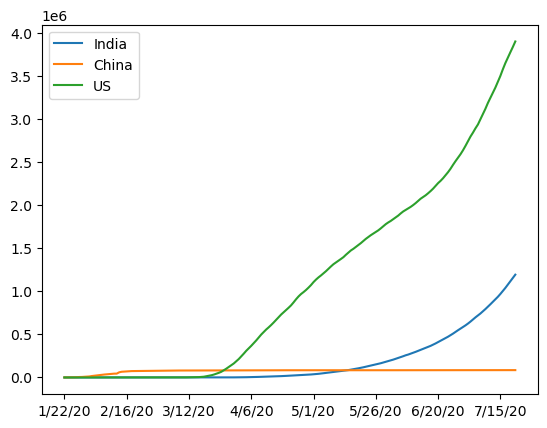

In [9]:
covid_aggregated.loc['India'].plot()
covid_aggregated.loc['China'].plot()
covid_aggregated.loc['US'].plot()
plt.legend()

# Calculating a good measure

**We need to find a good measure represented as a number, describing the spread of the virus in the country.**

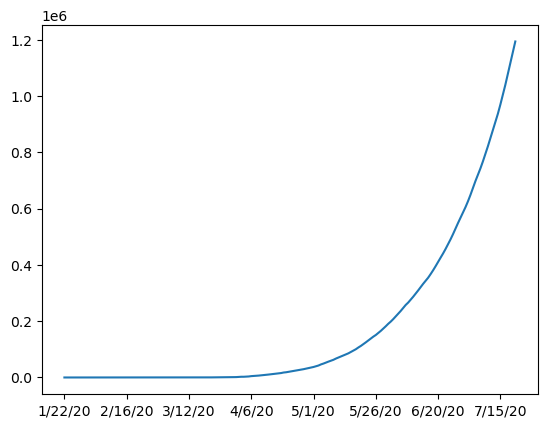

In [10]:
covid_aggregated.loc['India'].plot()
plt.show()

# Caculating the first derivative of the curve

<Axes: >

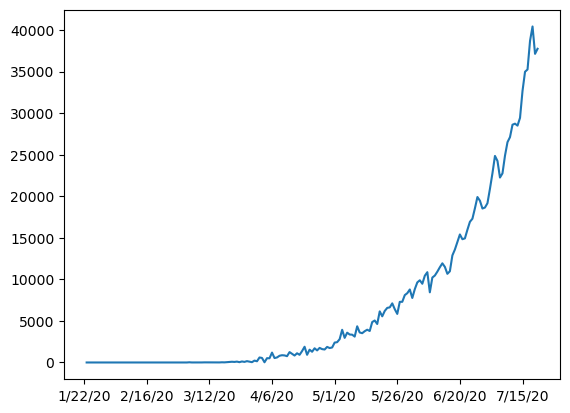

In [11]:
covid_aggregated.loc['India'].diff().plot()


# Find Maxmimum Infection Rate for India

In [12]:
covid_aggregated.loc['India'].diff().max()

40425.0

# Find Maxmimum Infection Rate for China

In [14]:
covid_aggregated.loc['China'].diff().max()

15136.0

# Find Maxmimum Infection Rate for US

In [15]:
covid_aggregated.loc['US'].diff().max()

77255.0

#  Find Maximum Infection Rate for all the countries

In [16]:
countries = list(covid_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(covid_aggregated.loc[country].diff().max())
covid_aggregated['Maximum Infection Rate'] = max_infection_rates
covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,Maximum Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34455,34740,34994,35070,35229,35301,35475,35526,35615,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,3571,3667,3752,3851,3906,4008,4090,4171,4290,119.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,19689,20216,20770,21355,21948,22549,23084,23691,24278,607.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,858,861,862,877,880,880,880,884,884,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,525,541,576,607,638,687,705,749,779,62.0


# Create a new dataframe with only Maximum Infection Rate column 

In [17]:
covid_data = pd.DataFrame(covid_aggregated['Maximum Infection Rate'])
covid_data

,Maximum Infection Rate
Country/Region,
Afghanistan,915.0
Albania,119.0
Algeria,607.0
Andorra,79.0
Angola,62.0
...,...
West Bank and Gaza,501.0
Western Sahara,4.0
Yemen,116.0


# Import World Happiness Report Dataset

In [18]:
happiness_report = pd.read_csv('C:/Users/FreeComp/Documents/EngAml/happiness_report.csv')
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# **Check the shape of the dataset**

In [19]:
happiness_report.shape

(156, 9)

**Drop unnecessary columns like Overall Rank, Score, Generosity, Perceptipns of corruption**

In [20]:
columns_to_drop = ['Overall rank','Score','Generosity','Perceptions of corruption']
happiness_report.drop(columns_to_drop, axis=1, inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


**Change the indices of the dataframe**

In [21]:
happiness_report.set_index('Country or region', inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


# COVID-19 final dataset

In [22]:
covid_data.head(10)

,Maximum Infection Rate
Country/Region,
Afghanistan,915.0
Albania,119.0
Algeria,607.0
Andorra,79.0
Angola,62.0
Antigua and Barbuda,39.0
Argentina,5344.0
Armenia,771.0
Australia,497.0


# World Happiness Report final dataset

In [23]:
happiness_report.head(10)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
Switzerland,1.452,1.526,1.052,0.572
Sweden,1.387,1.487,1.009,0.574
New Zealand,1.303,1.557,1.026,0.585
Canada,1.365,1.505,1.039,0.584


# merge the both final datasets we have prepared

In [44]:
data = happiness_report.join(covid_data).copy()
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


# Correlation Matrix

In [25]:
data.corr()
# it is representing the currelation between every two columns of our dataset

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.136931
Social support,0.754906,1.000000,0.719009,0.447333,0.110872
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.124985
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.072960
Maximum Infection Rate,0.136931,0.110872,0.124985,0.072960,1.000000


# Visualization of Results

**Our analysis isn't finished unless we visualize the results in terms figures and graphs so that everyone can understand what we have got out of our analysis**

In [26]:
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


In [27]:
data.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
count,156.000000,156.000000,156.000000,156.000000,144.000000
mean,0.905147,1.208814,0.725244,0.392571,2815.347222
std,0.398389,0.299191,0.242124,0.143289,7241.039364
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.602750,1.055750,0.547750,0.308000,115.500000
50%,0.960000,1.271500,0.789000,0.417000,479.000000
75%,1.232500,1.452500,0.881750,0.507250,1522.000000
max,1.684000,1.624000,1.141000,0.631000,54771.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to South Sudan
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GDP per capita                156 non-null    float64
 1   Social support                156 non-null    float64
 2   Healthy life expectancy       156 non-null    float64
 3   Freedom to make life choices  156 non-null    float64
 4   Maximum Infection Rate        144 non-null    float64
dtypes: float64(5)
memory usage: 11.4+ KB


# Conclusion

**From the above analysis, we came to a conclusion that people who are living in more developed countries are more prone to getting infected by the novel Corona virus as compared to those living in less developed countries.**
**This may be due to lack of Corona tests in the less developed countries. In order to prove that this is not the case, we can perform similar analysis on dataset related to cumulative number of deaths.**

# Loading Data in postgres

In [36]:
#load data in postgres
connect = psycopg2.connect(database = 'CovidAnalysis', user = "postgres", password = "root", host = "127.0.0.1", port = "5432")
#Clearing Message To Prove The Connect Successed 
print("#Success Connection")
curs = connect.cursor()

#Success Connection


In [ ]:
# To Ineracte With Date In Postgre 
curs.execute('''CREATE TABLE COVID_ANALYSIS
(Country_or_region    TEXT,
GDP_per_capita      FLOAT ,
Social_support      FLOAT,
Healthy_life_expectancy    FLOAT,
Freedom_to_make_life_choices    FLOAT,
Maximum_Infection_Rate   FLOAT);
''')
# Clearing Message To Prove The Table Is Created
print("#Success Create")
#commit() function is writen necessary to affect to database in Postgre
connect.commit()

In [37]:
#take an copy from data dataframe 
data_copy= data.copy()

In [38]:
# Convert pandas dataframe to list of list
data_copy_list = data_copy.astype('str').values.tolist()
data_copy_list

[['1.34', '1.587', '0.986', '0.596', '267.0'],
 ['1.383', '1.573', '0.996', '0.592', '391.0'],
 ['1.488', '1.582', '1.028', '0.603', '386.0'],
 ['1.38', '1.624', '1.026', '0.591', '99.0'],
 ['1.396', '1.522', '0.999', '0.557', '1346.0'],
 ['1.452', '1.526', '1.052', '0.572', '1321.0'],
 ['1.387', '1.487', '1.009', '0.574', '2530.0'],
 ['1.303', '1.557', '1.026', '0.585', '89.0'],
 ['1.365', '1.505', '1.039', '0.584', '2778.0'],
 ['1.376', '1.475', '1.016', '0.532', '1321.0'],
 ['1.372', '1.548', '1.036', '0.557', '497.0'],
 ['1.034', '1.441', '0.963', '0.558', '649.0'],
 ['1.276', '1.455', '1.029', '0.371', '2039.0'],
 ['1.609', '1.479', '1.012', '0.526', '234.0'],
 ['1.333', '1.538', '0.996', '0.45', '5505.0'],
 ['1.499', '1.553', '0.999', '0.516', '1515.0'],
 ['1.373', '1.454', '0.987', '0.495', '6933.0'],
 ['1.356', '1.504', '0.986', '0.473', '2454.0'],
 ['1.433', '1.457', '0.874', '0.454', 'nan'],
 ['1.269', '1.487', '0.92', '0.457', 'nan'],
 ['1.503', '1.31', '0.825', '0.598', '99

# Insert values from list to the database

We will now insert the list into the database using the SQL command `INSERT`.

In [46]:
connect = psycopg2.connect(database = 'CovidAnalysis', user = "postgres", password = "root", host = "127.0.0.1", port = "5432")
#Clearing Message To Prove The Connect Successed 
print("#Success Connection")
curs = connect.cursor()
try:
    # will use ? sign to represent each column names inside VALUE().
    curs.executemany('''INSERT INTO COVID_ANALYSIS( GDP_per_capita,
                    Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Maximum_Infection_Rate)
                     VALUES (%s,%s,%s,%s,%s)''', data_copy_list)
    connect.commit()
    print('COVID_ANALYSIS Data Inserted Successfully')
    
except Exception as e:
    # Print the exception error message
    print(str(e))
    print('COVID_ANALYSIS Data Insertion Failed')
    
finally:
    # finally close the database connection
    connect.close()

#Success Connection
COVID_ANALYSIS Data Inserted Successfully
